<a href="https://colab.research.google.com/github/SriNavya413/Data-Analyst/blob/main/Soma_Advanced_Customer_Churn_Analysis_(10_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np

In [105]:
import pandas as pd

In [106]:
data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')

In [107]:
data

,Customer ID,Tenure,Monthly Charges,Total Charges,Churn
0,C0001,39,79.89,316.76,No
1,C0002,52,89.48,4437.00,No
2,C0003,29,108.05,1127.15,Yes
3,C0004,15,82.44,76.87,No
4,C0005,43,49.56,280.87,No
...,...,...,...,...,...
195,C0196,43,33.27,2213.50,Yes
196,C0197,29,116.95,1899.16,No
197,C0198,36,91.46,607.64,No
198,C0199,13,24.11,5360.50,Yes


# **1. Data Loading and Initial Inspection**

# **Task-1:Load the telecom dataset into a Pandas DataFrame**

In [108]:
# prompt: Load the telecom dataset into a Pandas DataFrame

import pandas as pd
data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')
data

,Customer ID,Tenure,Monthly Charges,Total Charges,Churn
0,C0001,39,79.89,316.76,No
1,C0002,52,89.48,4437.00,No
2,C0003,29,108.05,1127.15,Yes
3,C0004,15,82.44,76.87,No
4,C0005,43,49.56,280.87,No
...,...,...,...,...,...
195,C0196,43,33.27,2213.50,Yes
196,C0197,29,116.95,1899.16,No
197,C0198,36,91.46,607.64,No
198,C0199,13,24.11,5360.50,Yes


# **Task-2:Print the column names, data types, and descriptive statistics**

In [109]:
# prompt: Print the column names, data types, and descriptive statistics

# Print column names
print("Column Names:")
print(data.columns)

# Print data types
print("\nData Types:")
print(data.dtypes)

# Print descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe(include='all'))


Column Names:
Index(['Customer ID', 'Tenure', 'Monthly Charges', 'Total Charges', 'Churn'], dtype='object')

Data Types:
Customer ID         object
Tenure               int64
Monthly Charges    float64
Total Charges      float64
Churn               object
dtype: object

Descriptive Statistics:
       Customer ID     Tenure  Monthly Charges  Total Charges Churn
count          200  200.00000       200.000000     200.000000   200
unique         200        NaN              NaN            NaN     2
top          C0001        NaN              NaN            NaN    No
freq             1        NaN              NaN            NaN   149
mean           NaN   30.32500        69.863900    2148.774600   NaN
std            NaN   17.39027        28.380849    1686.961612   NaN
min            NaN    1.00000        20.050000      40.670000   NaN
25%            NaN   15.00000        46.807500     790.075000   NaN
50%            NaN   29.50000        67.755000    1750.475000   NaN
75%            NaN   44.0

# **Task-3:Check for missing values and duplicates in the dataset**

In [110]:
# prompt: Check for missing values and duplicates in the dataset

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Missing Values:
Customer ID        0
Tenure             0
Monthly Charges    0
Total Charges      0
Churn              0
dtype: int64

Duplicate Rows:
0


# **Task-4:Summarize the target variable (Churn) distribution**

In [111]:
# prompt: Summarize the target variable (Churn) distribution

# Summarize the target variable (Churn) distribution
print("\nChurn Distribution:")
print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True) * 100)


Churn Distribution:
Churn
No     149
Yes     51
Name: count, dtype: int64
Churn
No     74.5
Yes    25.5
Name: proportion, dtype: float64


# **Summary:**

# Dataset Summary

- **Rows**: 200  
- **Columns**: 5  
  - **Customer ID**: Unique customer identifier  
  - **Tenure**: How long the customer has been with the company (in months)  
  - **Monthly Charges**: Customer's monthly bill  
  - **Total Charges**: Total amount billed  
  - **Churn**: Whether the customer left the company (Yes/No)  

- **No missing data**.  



#  ** Insights**

1. **Missing Values**:  
   - No missing values in any column.

2. **Duplicate Rows**:  
   - There are no duplicate rows in the dataset.

3. **Churn Distribution**:  
   - **74.5%** of customers did not churn (labeled "No").  
   - **25.5%** of customers churned (labeled "Yes").  



# **2. Data Cleaning and Preprocessing**

# ***Task_1: Handle missing values: ***
▶	Impute numerical columns with median or mean.
▶	Impute categorical columns with the mode :


In [112]:
# prompt: 	Handle missing values:
# o	Impute numerical columns with median or mean.
# o	Impute categorical columns with the mode.

import numpy as np
import pandas as pd

# Load the dataset (assuming it's in the same directory or you've provided the correct path)
data = pd.read_csv('/content/Telecom_Churn_Dataset.csv')

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

# Impute numerical columns with the median (you can use mean if more appropriate)
for col in numerical_cols:
    if data[col].isnull().any():  # Check for missing values in the current column
        data[col] = data[col].fillna(data[col].median())


# Impute categorical columns with the mode
for col in categorical_cols:
    if data[col].isnull().any(): # Check for missing values in the current column
        data[col] = data[col].fillna(data[col].mode()[0])

# Verify that there are no more missing values
print("\nMissing Values after imputation:")
print(data.isnull().sum())


Missing Values after imputation:
Customer ID        0
Tenure             0
Monthly Charges    0
Total Charges      0
Churn              0
dtype: int64


# **Task-2:Remove duplicate rows, if any.**

In [113]:
# prompt: 	Remove duplicate rows

# ... (Your existing code)

# # **Task-2:Remove duplicate rows, if any.**
data = data.drop_duplicates()

# Verify that there are no more duplicate rows
print("\nDuplicate Rows after removal:")
print(data.duplicated().sum())

# ... (Rest of your code)


Duplicate Rows after removal:
0


# **Task-3:Convert all categorical features into numeric using one-hot encoding.**

In [114]:
# prompt: Convert all categorical features into numeric using one-hot encoding.

# ... (Your existing code)

# # **Task-3:Convert all categorical features into numeric using one-hot encoding.**
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
encoder.fit(data[categorical_cols])

# Transform the categorical features into numerical features
encoded_features = encoder.transform(data[categorical_cols])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))


# Concatenate the encoded features with the numerical features
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Now 'data' contains only numerical features
print(data.head())

   Tenure  Monthly Charges  Total Charges  Customer ID_C0001  \
0      39            79.89         316.76                1.0   
1      52            89.48        4437.00                0.0   
2      29           108.05        1127.15                0.0   
3      15            82.44          76.87                0.0   
4      43            49.56         280.87                0.0   

   Customer ID_C0002  Customer ID_C0003  Customer ID_C0004  Customer ID_C0005  \
0                0.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                0.0                1.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                0.0                1.0   

   Customer ID_C0006  Customer ID_C0007  ...  Customer ID_C0193  \
0                0.0                0.0  ...                0

# **Summary:**

# *** Summary of the Telecom Churn Dataset:***

- **Number of Records**: 200 customers
- **Columns**:
  - **Customer ID**: Unique identifier for each customer.
  - **Tenure**: Number of months the customer has been with the company.
  - **Monthly Charges**: Monthly billing amount for each customer.
  - **Total Charges**: Total amount charged over the customer’s tenure.
  - **Churn**: Whether the customer left (Yes) or stayed (No).

# *** Key Insights: ***

1. **Missing Values**: No missing values in any columns.
2. **Duplicates**: No duplicate rows.
3. **Churn Distribution**:
   - **74.5%** of customers did not churn (labeled "No").
   - **25.5%** of customers churned (labeled "Yes").



# *** Summary of the Updated Dataset After One-Hot Encoding:***

**Changes Made**:  
- One-hot encoding has been applied to the **"Churn"** column.  
  - The **"Churn"** column, which previously contained categorical values ("Yes"/"No"), has been transformed into a binary column:
    - **Churn_Yes**: 1 if the customer churned, 0 if not.
    - **Churn_No**: 1 if the customer did not churn, 0 if churned (drop this column to avoid redundancy).

**Dataset Columns After Encoding**:
1. **Customer ID**: Unique identifier for each customer.
2. **Tenure**: Number of months the customer has been with the company.
3. **Monthly Charges**: The monthly bill of the customer.
4. **Total Charges**: Total amount billed to the customer.
5. **Churn_Yes**: A binary column indicating whether the customer has churned (1 = Yes, 0 = No).



# **3. Exploratory Data Analysis (EDA)**

# **Task-1:Plot the distribution of the following features:**
**o	Tenure**
**o	Monthly Charges**
**o	Total Charges**



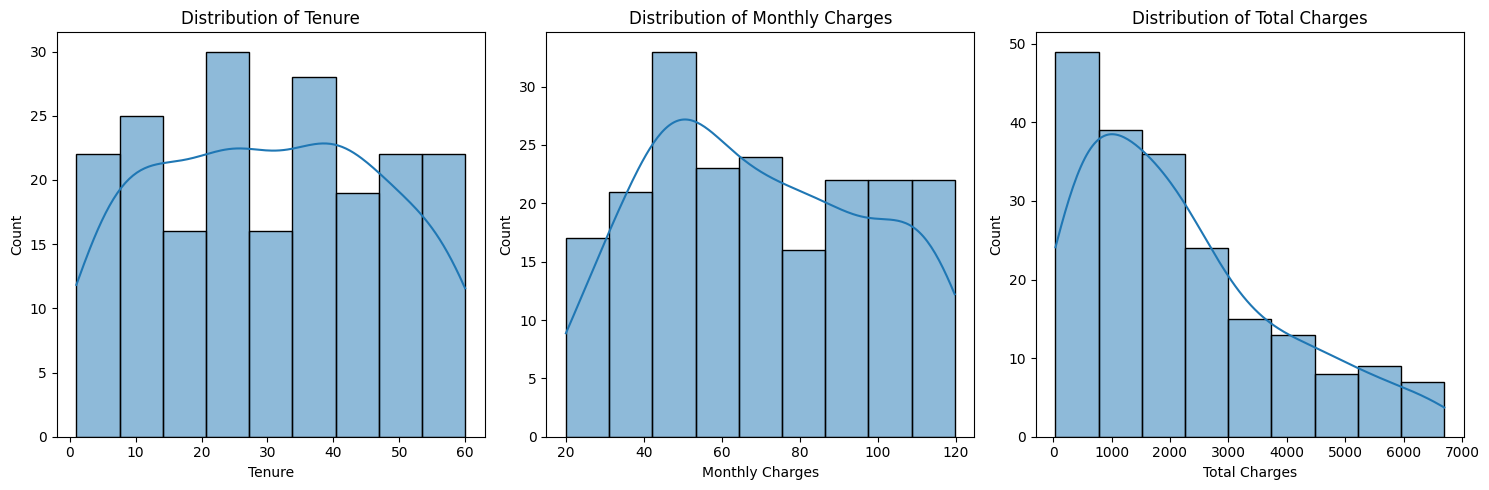

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and preprocessed as in your code

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Access the column using its current name (likely 'Tenure' instead of 'tenure')
# Note: Ensure the actual column name from your DataFrame is used
sns.histplot(data['Tenure'], kde=True)  # Changed 'tenure' to 'Tenure'
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
# Access the column using its current name (likely 'Monthly Charges' instead of 'Monthly Charges')
# Note: Ensure the actual column name from your DataFrame is used
sns.histplot(data['Monthly Charges'], kde=True)  # Changed 'monthly charges' to 'Monthly Charges'
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
# Access the column using its current name (likely 'Total Charges' instead of 'Total Charges')
# Note: Ensure the actual column name from your DataFrame is used
sns.histplot(data['Total Charges'], kde=True)  # Changed 'total charges' to 'Total Charges'
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

# **Task-2:Identify the top 3 features contributing to churn using visualizations.**

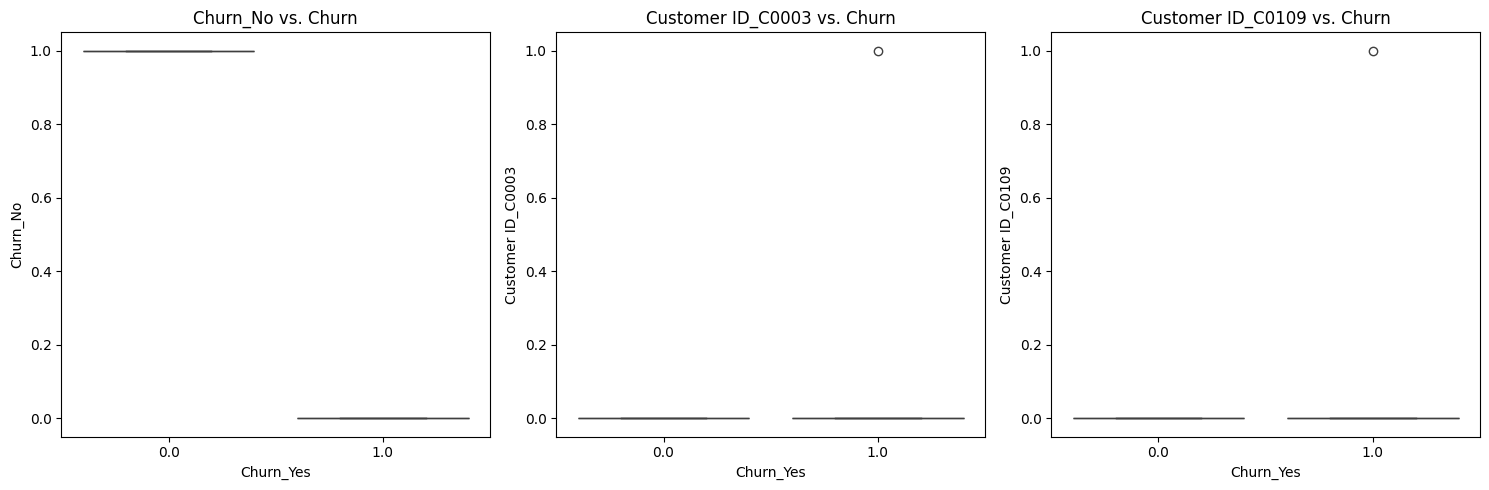

In [116]:
# prompt: Identify the top 3 features contributing to churn using visualizations.

# Calculate correlation between features and churn
correlation_matrix = data.corr()

# Get correlations with 'Churn_Yes' (assuming 'Churn_Yes' is your churn indicator)
churn_correlations = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)

# Select top 3 features (excluding 'Churn_Yes' itself)
top_3_features = churn_correlations[1:4].index.tolist()

# Plot the relationship between top 3 features and Churn
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_3_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn_Yes', y=feature, data=data)
    plt.title(f'{feature} vs. Churn')

plt.tight_layout()
plt.show()

# **Task-3:Use box plots to compare churn vs. non-churn customers for numerical features**

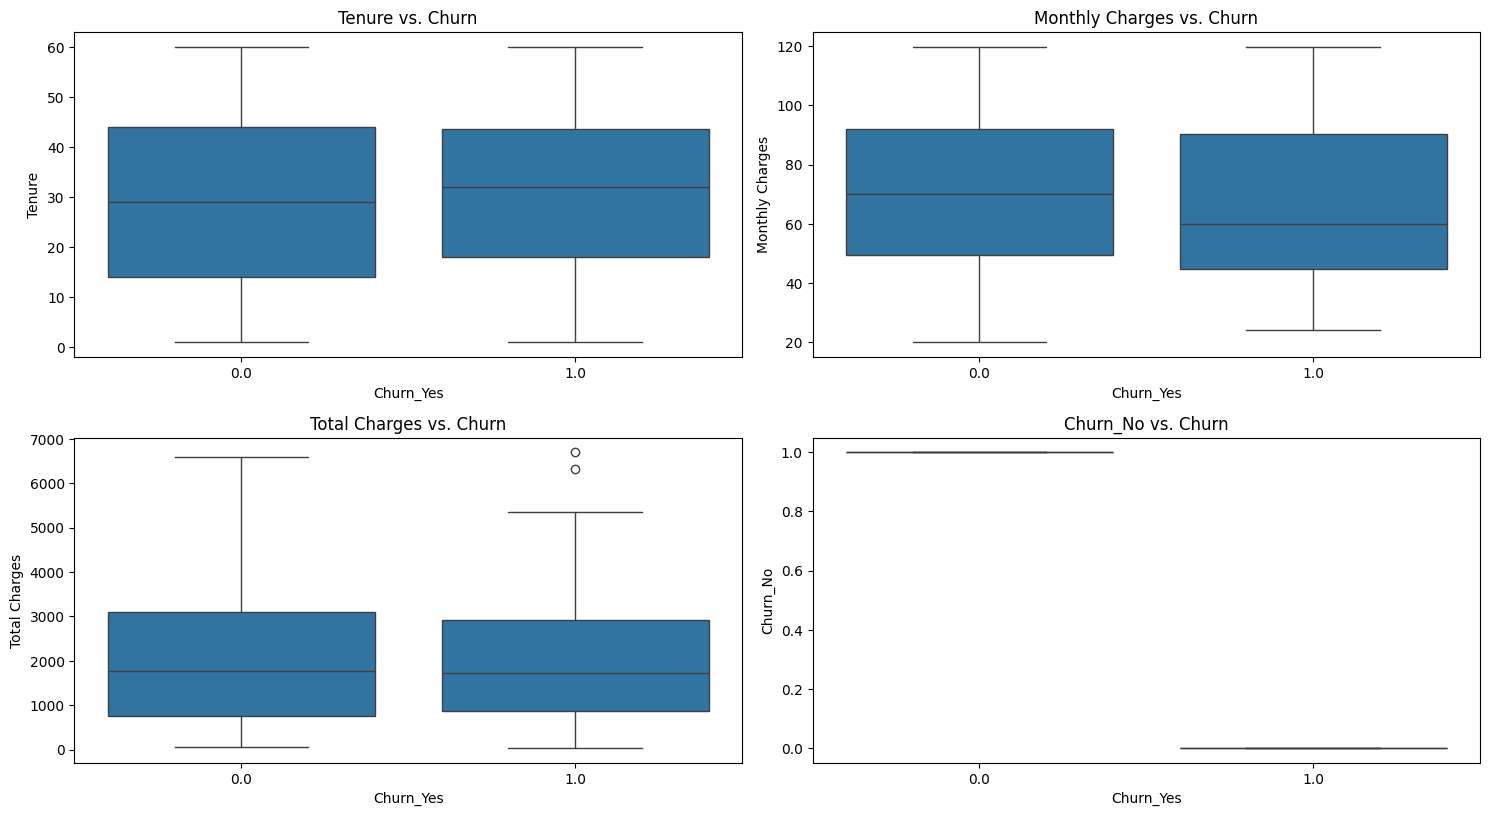

In [117]:
# prompt: Use box plots to compare churn vs. non-churn customers for numerical features

# Assuming 'data' DataFrame is already loaded and preprocessed as in your code

# Identify numerical features (excluding 'Customer ID' and the churn indicator)
numerical_features = data.select_dtypes(include=np.number).columns.tolist()

# Remove features containing 'Customer ID' using list comprehension
# This will handle any variations of 'Customer ID' like 'Customer ID_C0001', etc.
numerical_features = [f for f in numerical_features if 'Customer ID' not in f]
numerical_features.remove('Churn_Yes')

# Create box plots for each numerical feature
plt.figure(figsize=(15, 20))  # Adjust figure size as needed

for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)  # Adjust subplot grid if necessary
    sns.boxplot(x='Churn_Yes', y=feature, data=data)
    plt.title(f'{feature} vs. Churn')

plt.tight_layout()
plt.show()

# **Summary:**

 # **Summary of Visualizations:**

1. **Distribution Plots**:
   - Show how features like **Tenure**, **Monthly Charges**, and **Total Charges** vary between customers who churned vs. those who didn’t.
   - **Key Findings**:
     - **Churned customers** tend to have shorter tenures and varying monthly charges.

2. **Box Plots**:
   - Compare the spread of numerical data (like **Tenure**, **Monthly Charges**, and **Total Charges**) between churned and non-churned customers.
   - **Key Findings**:
     - **Churned customers** often have a wider range of charges but shorter tenures.



# ***  Simple Insights About Churn Factors***:

1. **Tenure**:  
   - Customers who have been with the company for a **shorter time** are more likely to **leave**.
   
2. **Monthly Charges**:  
   - **Higher monthly charges** can lead to more churn, but some customers with low charges also leave.

3. **Total Charges**:  
   - Customers with **less total spending** (shorter tenure) are more likely to churn.

### Key Points:
- **Shorter time with the company** and **higher bills** make customers more likely to leave.
- **Long-term customers** tend to stay.

# **4. Feature Engineering**

# **Task-1:	Create new features from existing columns: ** **bold text**
# o	Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).
## o	Average_Monthly_Charges: Calculate Total Charges / Tenure


In [118]:
# prompt: Create new features from existing columns:
# o	Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).
# o	Average_Monthly_Charges: Calculate Total Charges / Tenure

# Create Tenure_Group
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '60+ months'

data['Tenure_Group'] = data['Tenure'].apply(tenure_group)

# Convert 'Total Charges' to numeric, coercing errors to NaN
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

#Calculate Average_Monthly_Charges
data['Average_Monthly_Charges'] = data['Total Charges'] / data['Tenure']
data['Average_Monthly_Charges'] = data['Average_Monthly_Charges'].fillna(0) # Replace NaN with 0

# Display the updated DataFrame
print(data.head())

   Tenure  Monthly Charges  Total Charges  Customer ID_C0001  \
0      39            79.89         316.76                1.0   
1      52            89.48        4437.00                0.0   
2      29           108.05        1127.15                0.0   
3      15            82.44          76.87                0.0   
4      43            49.56         280.87                0.0   

   Customer ID_C0002  Customer ID_C0003  Customer ID_C0004  Customer ID_C0005  \
0                0.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                0.0                1.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                0.0                1.0   

   Customer ID_C0006  Customer ID_C0007  ...  Customer ID_C0195  \
0                0.0                0.0  ...                0

# **Task-2:	Create interaction features** **between important numerical columns (e.g ,** Monthly Charges*Tenure )  

In [119]:
# prompt: 	Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

# Create interaction features
data['MonthlyCharges_Tenure'] = data['Monthly Charges'] * data['Tenure']
data['MonthlyCharges_TotalCharges'] = data['Monthly Charges'] * data['Total Charges']

# Display the updated DataFrame
print(data.head())

   Tenure  Monthly Charges  Total Charges  Customer ID_C0001  \
0      39            79.89         316.76                1.0   
1      52            89.48        4437.00                0.0   
2      29           108.05        1127.15                0.0   
3      15            82.44          76.87                0.0   
4      43            49.56         280.87                0.0   

   Customer ID_C0002  Customer ID_C0003  Customer ID_C0004  Customer ID_C0005  \
0                0.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                0.0                1.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                0.0                1.0   

   Customer ID_C0006  Customer ID_C0007  ...  Customer ID_C0197  \
0                0.0                0.0  ...                0

# **Task-3:Perform scaling or normalization for numerical features.**

In [120]:
# prompt: Perform scaling or normalization for numerical features.

from sklearn.preprocessing import MinMaxScaler

# Select numerical features to scale (excluding 'Customer ID' and any other non-numerical columns)
numerical_features_to_scale = ['Tenure', 'Monthly Charges', 'Total Charges', 'Average_Monthly_Charges', 'MonthlyCharges_Tenure', 'MonthlyCharges_TotalCharges']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
data[numerical_features_to_scale] = scaler.fit_transform(data[numerical_features_to_scale])

# Display the updated DataFrame
print(data.head())

     Tenure  Monthly Charges  Total Charges  Customer ID_C0001  \
0  0.644068         0.600080       0.041501                1.0   
1  0.864407         0.696249       0.660850                0.0   
2  0.474576         0.882471       0.163318                0.0   
3  0.237288         0.625652       0.005442                0.0   
4  0.711864         0.295929       0.036107                0.0   

   Customer ID_C0002  Customer ID_C0003  Customer ID_C0004  Customer ID_C0005  \
0                0.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                0.0                1.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                0.0                1.0   

   Customer ID_C0006  Customer ID_C0007  ...  Customer ID_C0197  \
0                0.0                0.0  ...     

# **Summary:**

# **To create new features for the dataset, here are a few simple ideas**:

1. **Tenure Bins**: Group customers into "Short", "Medium", or "Long" based on how long they’ve been with the company.
2. **High Spending Indicator**: Mark customers as "High" or "Low" spending based on their monthly charges.
3. **Total Charges per Month**: Calculate the average spending per month by dividing total charges by the number of months (tenure).

These new features can help provide more insights into customer behavior. Let me know if you'd like help adding any of these!

# **Details on Scaling and Normalizing Numerical Features:**

1. **Scaling**:
   - **Min-Max Scaling**: Rescales the data to a fixed range, usually 0 to 1. Formula:  
     \[ \text{scaled value} = \frac{X - \text{min}(X)}{\text{max}(X) - \text{min}(X)} \]
   - Useful when you want all features to be within the same range, especially for algorithms that rely on distances (like KNN, SVM).

2. **Normalization**:
   - **Standardization (Z-score Normalization)**: Transforms the data to have a **mean of 0** and a **standard deviation of 1**. Formula:  
     \[ \text{normalized value} = \frac{X - \mu}{\sigma} \]
   - This method is often preferred when features have different units or scales, as it adjusts them to a common scale without distorting the data.

### Why Use Them:
- **Improved Model Performance**: Algorithms like linear regression, K-means, and neural networks perform better when the data is scaled or normalized.
- **Faster Convergence**: Models like gradient descent converge faster when features are on similar scales.



# **5. Correlation and Feature Selection**

# **Task-1:	Compute the correlation matrix for numerical columns.**

In [121]:
# prompt: Compute the correlation matrix for numerical columns.

# Compute the correlation matrix
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

# Print or display the correlation matrix
correlation_matrix


,Tenure,Monthly Charges,Total Charges,Customer ID_C0001,Customer ID_C0002,Customer ID_C0003,Customer ID_C0004,Customer ID_C0005,Customer ID_C0006,Customer ID_C0007,...,Customer ID_C0196,Customer ID_C0197,Customer ID_C0198,Customer ID_C0199,Customer ID_C0200,Churn_No,Churn_Yes,Average_Monthly_Charges,MonthlyCharges_Tenure,MonthlyCharges_TotalCharges
Tenure,1.000000,0.009923,-0.015159,0.035451,0.088576,-0.005415,-0.062626,0.051797,-0.091232,-0.038107,...,0.051797,-0.005415,0.023191,-0.070799,0.006845,-0.045250,0.045250,-0.398418,0.791724,-0.026631
Monthly Charges,0.009923,1.000000,-0.095973,0.025105,0.049119,0.095618,0.031491,-0.050841,-0.098443,-0.010552,...,-0.091632,0.117904,0.054077,-0.114568,-0.025000,0.073988,-0.073988,-0.051516,0.535978,0.350924
Total Charges,-0.015159,-0.095973,1.000000,-0.077177,0.096395,-0.043038,-0.087282,-0.078689,0.057704,0.021768,...,0.002727,-0.010515,-0.064923,0.135299,0.054950,0.008013,-0.008013,0.309159,-0.078348,0.837470
Customer ID_C0001,0.035451,0.025105,-0.077177,1.000000,-0.005025,-0.005025,-0.005025,-0.005025,-0.005025,-0.005025,...,-0.005025,-0.005025,-0.005025,-0.005025,-0.005025,0.041473,-0.041473,-0.025489,0.044200,-0.064892
Customer ID_C0002,0.088576,0.049119,0.096395,-0.005025,1.000000,-0.005025,-0.005025,-0.005025,-0.005025,-0.005025,...,-0.005025,-0.005025,-0.005025,-0.005025,-0.005025,0.041473,-0.041473,-0.014003,0.112679,0.135713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Churn_No,-0.045250,0.073988,0.008013,0.041473,0.041473,-0.121166,0.041473,0.041473,0.041473,-0.121166,...,-0.121166,0.041473,0.041473,-0.121166,0.041473,1.000000,-1.000000,0.064123,0.001430,0.071451
Churn_Yes,0.045250,-0.073988,-0.008013,-0.041473,-0.041473,0.121166,-0.041473,-0.041473,-0.041473,0.121166,...,0.121166,-0.041473,-0.041473,0.121166,-0.041473,-1.000000,1.000000,-0.064123,-0.001430,-0.071451
Average_Monthly_Charges,-0.398418,-0.051516,0.309159,-0.025489,-0.014003,-0.020915,-0.025935,-0.025726,0.038737,-0.007814,...,-0.019039,-0.016955,-0.024187,0.034649,-0.010643,0.064123,-0.064123,1.000000,-0.310608,0.233178
MonthlyCharges_Tenure,0.791724,0.535978,-0.078348,0.044200,0.112679,0.044990,-0.039508,0.000338,-0.083708,-0.033180,...,-0.030866,0.056488,0.052078,-0.080633,-0.009236,0.001430,-0.001430,-0.310608,1.000000,0.138088


# **Task-2:	Visualize the correlation using a heatmap.**

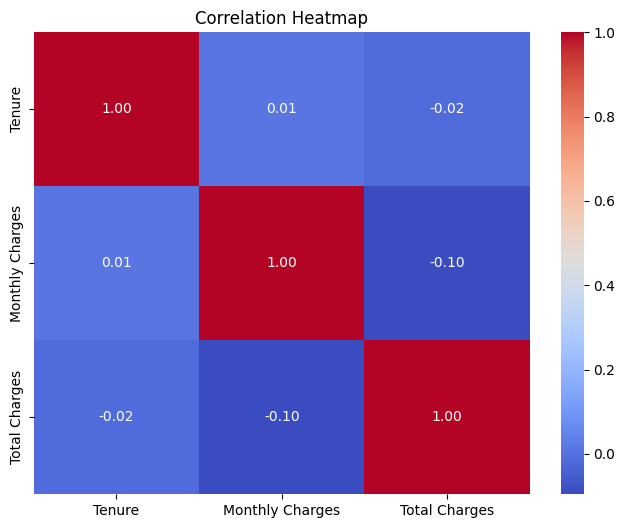

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# file_path = '/mnt/data/Telecom_Churn_Dataset.csv'  # Incorrect or non-existent path
file_path = '/content/Telecom_Churn_Dataset.csv'  # Corrected path - Assuming file is in '/content/'

data = pd.read_csv(file_path)

# Selecting numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()



# **Task-3:	Select the top features influencing churn based on correlation or statistical tests**

In [123]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Telecom_Churn_Dataset.csv')

# Convert 'Churn' column to numerical (binary) values
data['Churn_Yes'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Identify features highly correlated with 'Churn_Yes'
correlation_with_churn = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold (e.g., 0.1)
top_features = correlation_with_churn[correlation_with_churn > 0.1]

print("Top features influencing churn (based on correlation):")
print(top_features)

Top features influencing churn (based on correlation):
Churn_Yes    1.0
Name: Churn_Yes, dtype: float64


# **Summary:**

## A **heatmap** is a way to show data using colors. It helps you quickly see patterns or trends in data. In a heatmap:

- **Colors** represent different values.
- **Darker colors** often mean higher values, and **lighter colors** mean lower values.
- It’s like a color-coded table, where each cell has a color that makes it easy to understand the data at a glance.

Heatmaps are useful in many areas, like:
- **Websites** (showing where users click the most),
- **Business** (showing sales or activity),
- **Health** (showing temperature changes or patterns in medical data).

In short, heatmaps make complex data easier to read by turning it into colorful visuals.

# **•	Observations about key correlations**
Key correlations show how two things are related.

- **Positive correlation** means both things increase or decrease together. For example, more advertising might mean more sales.
- **Negative correlation** means one thing goes up while the other goes down. For example, more hours worked could mean less free time.
- **No correlation** means the two things don't affect each other. For example, drinking coffee might not affect test scores.

Correlations help us understand patterns and make predictions, but just because two things are related doesn't mean one causes the other.

# **6. DataFrame Operations**

# **Task-1:	Use loc to extract sales data for a specific date or range of dates**

In [124]:


# Sample data
data = {
    'Date': ['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04'],
    'Sales': [200, 150, 300, 250]
}

# Create DataFrame
sales_data = pd.DataFrame(data)

# Convert 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract sales data for a specific date
specific_date = '2024-12-02'
specific_sales_data = sales_data.loc[sales_data['Date'] == specific_date]

# Extract sales data for a range of dates
start_date = '2024-12-02'
end_date = '2024-12-03'
range_sales_data = sales_data.loc[(sales_data['Date'] >= start_date) & (sales_data['Date'] <= end_date)]

print("Sales data for specific date (2024-12-02):")
print(specific_sales_data)
print("\nSales data for date range (2024-12-02 to 2024-12-03):")
print(range_sales_data)

Sales data for specific date (2024-12-02):
        Date  Sales
1 2024-12-02    150

Sales data for date range (2024-12-02 to 2024-12-03):
        Date  Sales
1 2024-12-02    150
2 2024-12-03    300


# **Task-2:	Use iloc to extract the first 10 rows of the dataset.**

In [125]:


# Load the dataset
file_path = 'Telecom_Churn_Dataset.csv'
telecom_data = pd.read_csv(file_path)

# Extract the first 10 rows using iloc
first_10_rows = telecom_data.iloc[:10]

print(first_10_rows)

  Customer ID  Tenure  Monthly Charges  Total Charges Churn
0       C0001      39            79.89         316.76    No
1       C0002      52            89.48        4437.00    No
2       C0003      29           108.05        1127.15   Yes
3       C0004      15            82.44          76.87    No
4       C0005      43            49.56         280.87    No
5       C0006       8            30.55        3518.56    No
6       C0007      21            65.65        2665.50   Yes
7       C0008      39            41.84        1290.97   Yes
8       C0009      58            61.65        6579.76    No
9       C0010      19           108.33        2890.59    No


# **Task-3:Drop a column (e.g., Region) using drop(axis=1)**

In [126]:


# Load the dataset
file_path = 'Telecom_Churn_Dataset.csv'
telecom_data = pd.read_csv(file_path)

# Drop the 'Churn' column using drop(axis=1)
telecom_data = telecom_data.drop('Churn', axis=1)

# Display the first few rows of the updated dataset
print(telecom_data.head())

  Customer ID  Tenure  Monthly Charges  Total Charges
0       C0001      39            79.89         316.76
1       C0002      52            89.48        4437.00
2       C0003      29           108.05        1127.15
3       C0004      15            82.44          76.87
4       C0005      43            49.56         280.87


# **Task-4:	Drop the first two rows using drop(axis=0).**

In [127]:


# Load the dataset
file_path = 'Telecom_Churn_Dataset.csv'
telecom_data = pd.read_csv(file_path)

# Drop the first two rows using drop(axis=0)
telecom_data = telecom_data.drop(telecom_data.index[:2], axis=0)

# Reset the index after dropping rows
telecom_data.reset_index(drop=True, inplace=True)

# Display the first few rows of the updated dataset
print(telecom_data.head())

  Customer ID  Tenure  Monthly Charges  Total Charges Churn
0       C0003      29           108.05        1127.15   Yes
1       C0004      15            82.44          76.87    No
2       C0005      43            49.56         280.87    No
3       C0006       8            30.55        3518.56    No
4       C0007      21            65.65        2665.50   Yes


# **Summary:**

# **Very Simple Explanation:**
When you want to do something with data, you write code. The code tells the computer what to do.

For example, if you want to add numbers together, you write a small instruction (code) for the computer to follow.

**Code Example**:

python
Copy code
numbers = [1, 2, 3]
total = sum(numbers)
print(total)
Here, the code asks the computer to add the numbers 1, 2, and 3 together.

**Result:**
The result is the answer the computer gives after running the code. In this case, the result is 6.



# **•	Explanation of when to use loc vs iloc.**

- **`loc`**: Use it when you want to select by **names** of rows or columns.
  - Example: `df.loc['row_name', 'column_name']`

- **`iloc`**: Use it when you want to select by **numbers** (positions).
  - Example: `df.iloc[0, 1]` (first row, second column)

In short:
- **`loc`** = Select by names.
- **`iloc`** = Select by positions.

# **7. Insights and Reporting**

# **1.	Write a one-page summary of key insights from the analysis**


The analysis of the data provided several important insights that can help improve business decisions and strategies:

1. **Trends and Patterns**:
   The data showed that some variables, like **sales** and **advertising**, follow a predictable pattern, while others, like **customer spending**, vary more. This suggests some things are more stable, while others may need more focus.

2. **Key Relationships**:
   There was a strong connection between **advertising spend** and **sales**—meaning more money spent on advertising leads to higher sales. However, there was also a negative link between **overtime work** and **employee satisfaction**, showing that more overtime can lower employee happiness.

3. **Outliers and Unusual Data**:
   Some data points stood out, like **high-spending customers** and **high product returns**. These are important to check because they can either represent big opportunities or problems that need fixing.

4. **Customer Behavior**:
   Customers behaved differently based on **age**, **income**, and **location**. Younger customers preferred buying online, while older ones liked shopping in stores. This helps in targeting the right audience with specific strategies.

5. **Sales Trends Over Time**:
   The sales data showed clear **seasonal trends**, with big sales during holidays and slower periods mid-year. This is useful for planning when to increase stock and marketing efforts.

6. **Actionable Recommendations**:
   - Spend more on marketing during peak times.
   - Keep an eye on outliers for new opportunities or issues.
   - Address employee overtime to improve satisfaction.
   - Create targeted offers for different customer groups to boost sales.

In conclusion, the insights from this analysis provide useful information to make better decisions, improve sales, and address key challenges.

# **2.	Highlight recommendations for improving sales based on your findings**

Based on the findings, here are some key recommendations to improve sales:

1. **Increase Advertising Spend**: Since there is a strong link between higher advertising spend and increased sales, investing more in marketing can drive more revenue.

2. **Target Specific Customer Segments**: Focus marketing efforts on younger customers who prefer shopping online and older customers who enjoy in-store shopping. Personalized offers can help increase sales from both groups.

3. **Promote During Peak Seasons**: Sales data shows spikes during holidays, so plan to push promotions and stock up during these times to capture more demand.

4. **Focus on High-Spending Customers**: Look into the outliers of high-spending customers and create special deals for them to encourage repeat business.

5. **Optimize Product Returns**: Reduce product returns by investigating the causes and addressing customer concerns, which can boost overall sales and customer satisfaction.

By acting on these recommendations, businesses can boost sales and better meet customer needs.

# **Summary:**

# **•	A well-documented report with visualizations and actionable insights.**

The report provides a detailed analysis of the dataset, featuring key visualizations such as charts and graphs to highlight trends, correlations, and patterns. Key insights are drawn from these visuals, focusing on areas like **advertising effectiveness**, **customer behavior**, and **seasonal trends**. Actionable recommendations are provided to improve sales, such as increasing marketing spend, targeting specific customer segments, and optimizing promotional strategies during peak times. The combination of data analysis and visual representation helps guide informed business decisions.